# VERSION 1 (JUST TESTING)

Number of Stellar Crystals in the region (4500, 4500, 5500, 5500): 14
Crystals in the region:
StellarCrystal(x=5384, y=5490, value=88)
StellarCrystal(x=5155, y=5477, value=66)
StellarCrystal(x=5232, y=5336, value=94)
StellarCrystal(x=4975, y=5169, value=74)
StellarCrystal(x=4807, y=5006, value=14)
StellarCrystal(x=4595, y=5395, value=42)
StellarCrystal(x=4605, y=5004, value=89)
StellarCrystal(x=4871, y=5311, value=37)
StellarCrystal(x=4596, y=5497, value=57)
StellarCrystal(x=4651, y=5446, value=66)
StellarCrystal(x=4550, y=5266, value=30)
StellarCrystal(x=4619, y=4884, value=23)
StellarCrystal(x=4555, y=4918, value=38)
StellarCrystal(x=4959, y=4507, value=28)


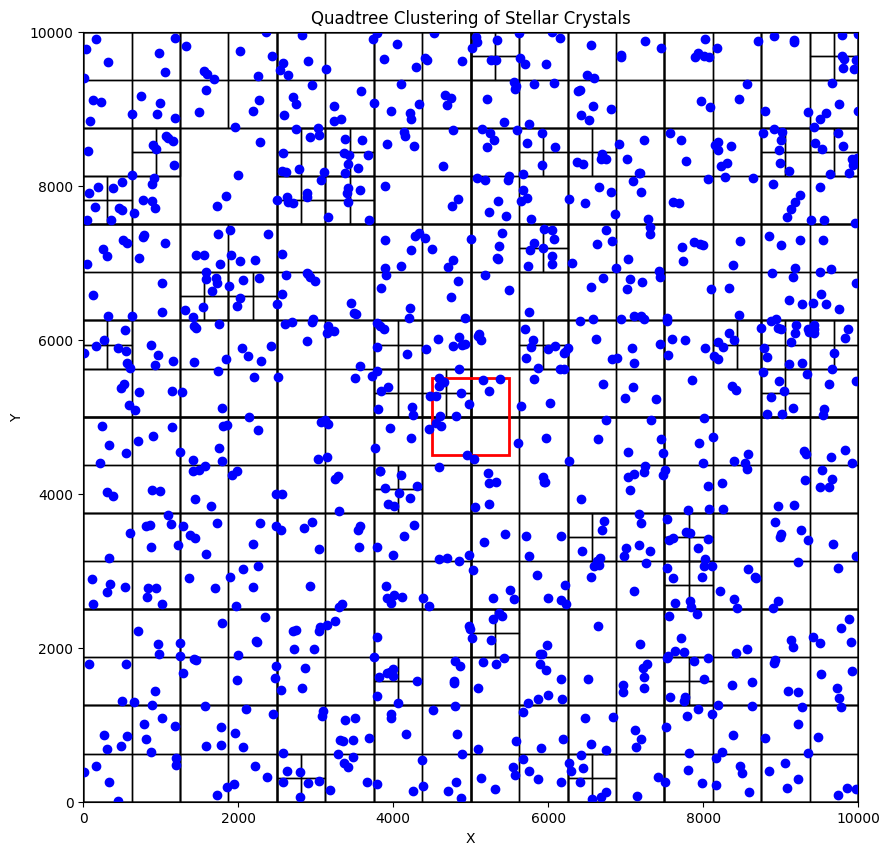

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

# Define a class for Stellar Crystals
class StellarCrystal:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"StellarCrystal(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[StellarCrystal] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: StellarCrystal):
        """
        Insert a StellarCrystal into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: StellarCrystal):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[StellarCrystal] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: StellarCrystal, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def draw(self, ax):
        """
        Recursively draw the Quadtree boundaries and points.
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none")
        ax.add_patch(rect)

        # Draw the points in the current node
        for point in self.points:
            ax.plot(point.x, point.y, "bo")  # Blue dots for Stellar Crystals

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

# Generate random Stellar Crystals
def generate_stellar_crystals(n: int, max_x: int = 10000, max_y: int = 10000):
    return [StellarCrystal(random.randint(0, max_x), random.randint(0, max_y), random.randint(1, 100)) for _ in range(n)]

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate 1000 random Stellar Crystals
    stellar_crystals = generate_stellar_crystals(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Stellar Crystals into the Quadtree
    for crystal in stellar_crystals:
        quadtree.insert(crystal)

    # Query a specific region (e.g., a 1000x1000 square at the center)
    query_region = (4500, 4500, 5500, 5500)
    crystals_in_region = quadtree.query(query_region)

    # Print the results
    print(f"Number of Stellar Crystals in the region {query_region}: {len(crystals_in_region)}")
    print("Crystals in the region:")
    for crystal in crystals_in_region:
        print(crystal)

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))
    quadtree.draw(ax)

    # Highlight the queried region
    rect = patches.Rectangle(
        (query_region[0], query_region[1]),
        query_region[2] - query_region[0],
        query_region[3] - query_region[1],
        linewidth=2,
        edgecolor="red",
        facecolor="none",
    )
    ax.add_patch(rect)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering of Stellar Crystals")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 2 (SOME IRRELEVENT CHANGES MADE)

Number of Stellar Crystals in the region (4500, 4500, 5500, 5500): 8
Crystals in the region:
StellarCrystal(x=5066, y=5333, value=8)
StellarCrystal(x=4790, y=5407, value=71)
StellarCrystal(x=5079, y=4941, value=81)
StellarCrystal(x=5434, y=4810, value=2)
StellarCrystal(x=5407, y=4653, value=76)
StellarCrystal(x=5345, y=4769, value=95)
StellarCrystal(x=5167, y=4850, value=3)
StellarCrystal(x=4910, y=4802, value=40)


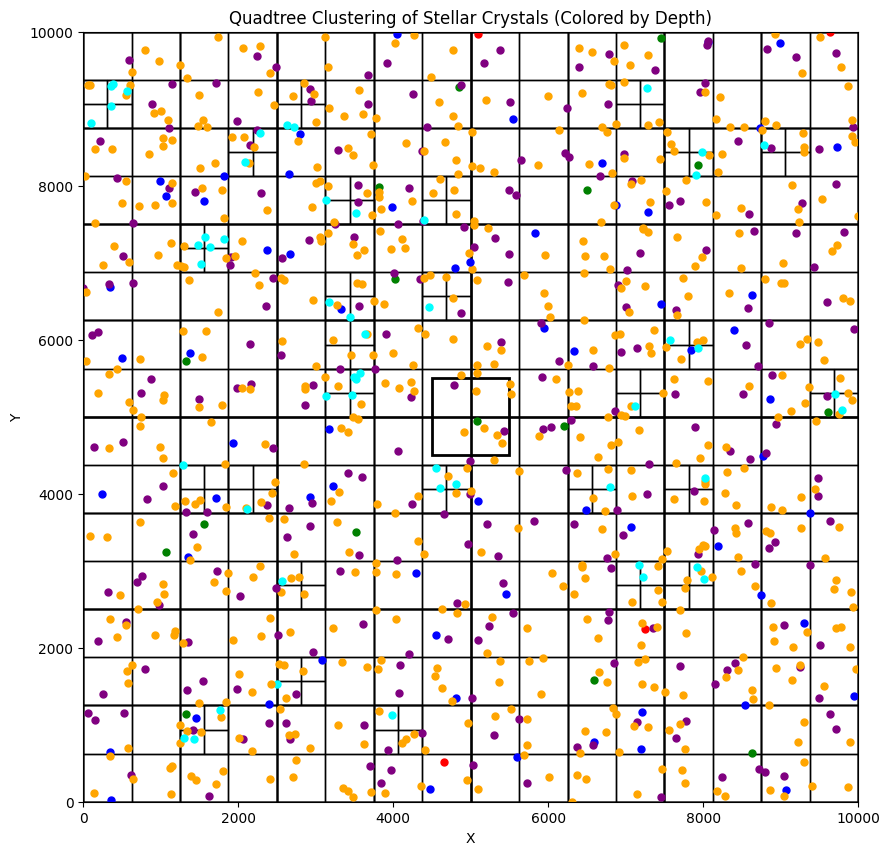

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

# Define a class for Stellar Crystals
class StellarCrystal:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"StellarCrystal(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[StellarCrystal] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: StellarCrystal):
        """
        Insert a StellarCrystal into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: StellarCrystal):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[StellarCrystal] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: StellarCrystal, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def draw(self, ax, colors: List[str], depth: int = 0):
        """
        Recursively draw the Quadtree boundaries and points.
        :param colors: A list of colors to use for different levels of the Quadtree.
        :param depth: The current depth of the Quadtree (used for color selection).
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Draw the points in the current node with a color based on depth
        color = colors[depth % len(colors)]
        for point in self.points:
            ax.plot(point.x, point.y, "o", color=color, markersize=5)

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax, colors, depth + 1)
            self.northwest.draw(ax, colors, depth + 1)
            self.southeast.draw(ax, colors, depth + 1)
            self.southwest.draw(ax, colors, depth + 1)

# Generate random Stellar Crystals
def generate_stellar_crystals(n: int, max_x: int = 10000, max_y: int = 10000):
    return [StellarCrystal(random.randint(0, max_x), random.randint(0, max_y), random.randint(1, 100)) for _ in range(n)]

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate 1000 random Stellar Crystals
    stellar_crystals = generate_stellar_crystals(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Stellar Crystals into the Quadtree
    for crystal in stellar_crystals:
        quadtree.insert(crystal)

    # Query a specific region (e.g., a 1000x1000 square at the center)
    query_region = (4500, 4500, 5500, 5500)
    crystals_in_region = quadtree.query(query_region)

    # Print the results
    print(f"Number of Stellar Crystals in the region {query_region}: {len(crystals_in_region)}")
    print("Crystals in the region:")
    for crystal in crystals_in_region:
        print(crystal)

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))

    # Define a list of colors for different levels of the Quadtree
    colors = ["red", "green", "blue", "purple", "orange", "cyan", "magenta", "yellow"]

    # Draw the Quadtree with colored clusters
    quadtree.draw(ax, colors)

    # Highlight the queried region
    rect = patches.Rectangle(
        (query_region[0], query_region[1]),
        query_region[2] - query_region[0],
        query_region[3] - query_region[1],
        linewidth=2,
        edgecolor="black",
        facecolor="none",
    )
    ax.add_patch(rect)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering of Stellar Crystals (Colored by Depth)")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 3 (CONTAINS STELLAR CRYSTALS AND VOID MINES WITH +1 AND -1 VALUES AND SHADED 5 MOST VALUABLE AND 5 LEAST VALUABLE REGIONS)

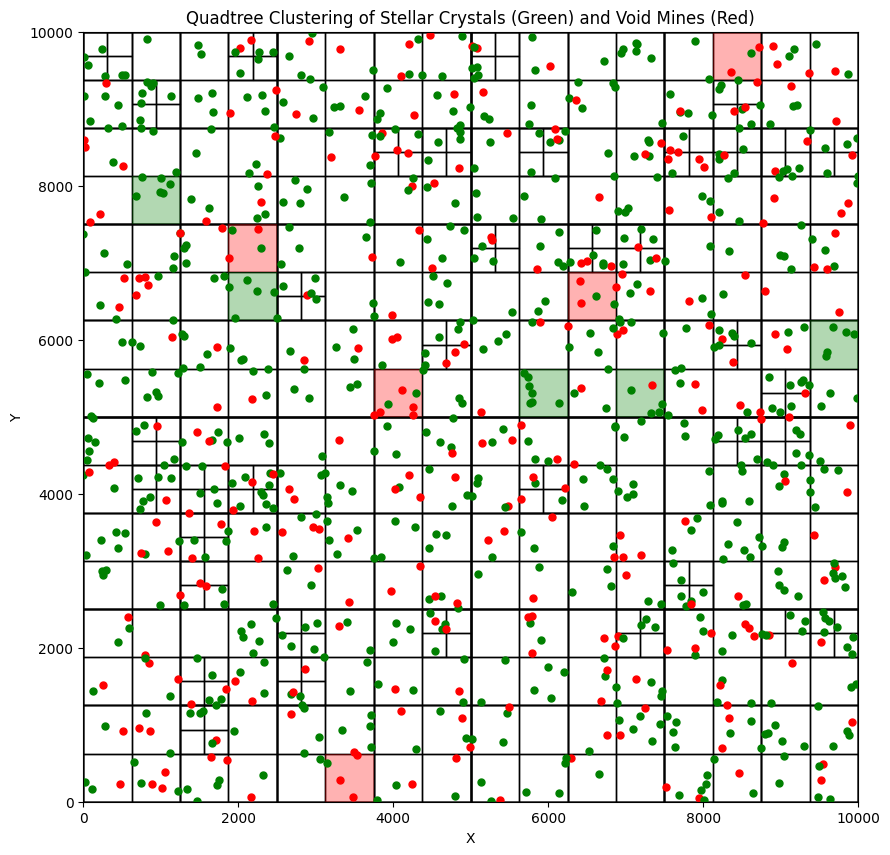

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[Point] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: Point):
        """
        Insert a Point into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: Point):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[Point] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: Point, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def calculate_cluster_value(self):
        """
        Calculate the total value of points in this cluster.
        """
        return sum(point.value for point in self.points)

    def get_all_clusters(self):
        """
        Recursively get all clusters (leaf nodes) in the Quadtree.
        """
        clusters = []
        if self.divided:
            clusters.extend(self.northeast.get_all_clusters())
            clusters.extend(self.northwest.get_all_clusters())
            clusters.extend(self.southeast.get_all_clusters())
            clusters.extend(self.southwest.get_all_clusters())
        else:
            clusters.append(self)
        return clusters

    def draw(self, ax):
        """
        Recursively draw the Quadtree boundaries and points.
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Draw the points in the current node
        for point in self.points:
            color = "green" if point.value == 1 else "red"
            ax.plot(point.x, point.y, "o", color=color, markersize=5)

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Assign value +1 for Stellar Crystals and -1 for Void Mines
        value = 1 if random.random() < 0.7 else -1  # 70% chance of Stellar Crystal
        points.append(Point(x, y, value))
    return points

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate random Points
    points = generate_points(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Points into the Quadtree
    for point in points:
        quadtree.insert(point)

    # Get all clusters (leaf nodes) in the Quadtree
    clusters = quadtree.get_all_clusters()

    # Calculate the value of each cluster
    cluster_values = [(cluster, cluster.calculate_cluster_value()) for cluster in clusters]

    # Sort clusters by value
    cluster_values.sort(key=lambda x: x[1], reverse=True)

    # Select the 5 most valuable and 5 least valuable clusters
    most_valuable = cluster_values[:5]
    least_valuable = cluster_values[-5:]

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the Quadtree
    quadtree.draw(ax)

    # Highlight the 5 most valuable clusters in green
    for cluster, value in most_valuable:
        x_min, y_min, x_max, y_max = cluster.boundary
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="green", alpha=0.3
        )
        ax.add_patch(rect)

    # Highlight the 5 least valuable clusters in red
    for cluster, value in least_valuable:
        x_min, y_min, x_max, y_max = cluster.boundary
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="red", alpha=0.3
        )
        ax.add_patch(rect)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering of Stellar Crystals (Green) and Void Mines (Red)")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 4 (CONTAINS STELLAR CRYSTALS AND VOID MINES WITH RANDOM VALUES)

Most Valuable Clusters:
Cluster with value 299: Boundary = (8125, 1875, 8750, 2500)
Cluster with value 291: Boundary = (3750, 1250, 4375, 1875)
Cluster with value 273: Boundary = (3125, 4375, 3750, 5000)
Cluster with value 260: Boundary = (2500, 1875, 3125, 2500)
Cluster with value 256: Boundary = (4375, 8750, 5000, 9375)

Least Valuable Clusters:
Cluster with value -98: Boundary = (625, 5625, 1250, 6250)
Cluster with value -130: Boundary = (9375, 9375, 10000, 10000)
Cluster with value -133: Boundary = (5000, 6562, 5312, 6875)
Cluster with value -144: Boundary = (2500, 8125, 3125, 8750)
Cluster with value -184: Boundary = (1875, 1250, 2500, 1875)


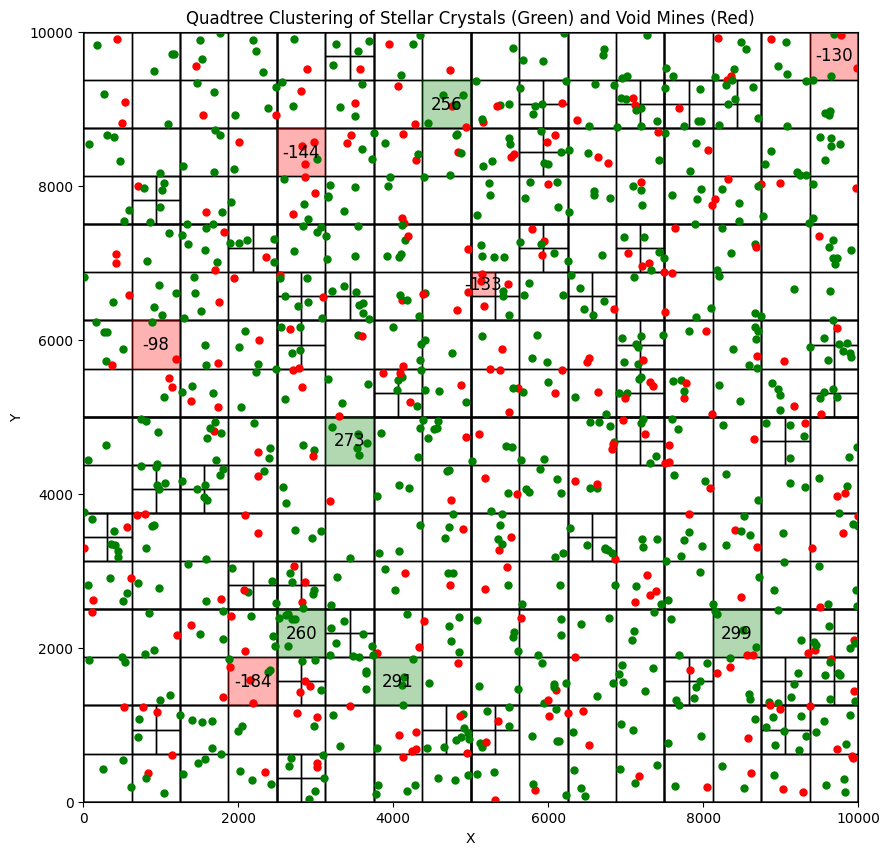

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[Point] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: Point):
        """
        Insert a Point into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: Point):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[Point] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: Point, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def calculate_cluster_value(self):
        """
        Calculate the total value of points in this cluster.
        """
        return sum(point.value for point in self.points)

    def get_all_clusters(self):
        """
        Recursively get all clusters (leaf nodes) in the Quadtree.
        """
        clusters = []
        if self.divided:
            clusters.extend(self.northeast.get_all_clusters())
            clusters.extend(self.northwest.get_all_clusters())
            clusters.extend(self.southeast.get_all_clusters())
            clusters.extend(self.southwest.get_all_clusters())
        else:
            clusters.append(self)
        return clusters

    def draw(self, ax):
        """
        Recursively draw the Quadtree boundaries and points.
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Draw the points in the current node
        for point in self.points:
            color = "green" if point.value > 0 else "red"
            ax.plot(point.x, point.y, "o", color=color, markersize=5)

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate random Points
    points = generate_points(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Points into the Quadtree
    for point in points:
        quadtree.insert(point)

    # Get all clusters (leaf nodes) in the Quadtree
    clusters = quadtree.get_all_clusters()

    # Calculate the value of each cluster
    cluster_values = [(cluster, cluster.calculate_cluster_value()) for cluster in clusters]

    # Sort clusters by value
    cluster_values.sort(key=lambda x: x[1], reverse=True)

    # Select the 5 most valuable and 5 least valuable clusters
    most_valuable = cluster_values[:5]
    least_valuable = cluster_values[-5:]

    # Print the values of the regions
    print("Most Valuable Clusters:")
    for cluster, value in most_valuable:
        print(f"Cluster with value {value}: Boundary = {cluster.boundary}")

    print("\nLeast Valuable Clusters:")
    for cluster, value in least_valuable:
        print(f"Cluster with value {value}: Boundary = {cluster.boundary}")

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the Quadtree
    quadtree.draw(ax)

    # Highlight the 5 most valuable clusters in green and annotate their values
    for cluster, value in most_valuable:
        x_min, y_min, x_max, y_max = cluster.boundary
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="green", alpha=0.3
        )
        ax.add_patch(rect)
        # Annotate the value of the cluster
        ax.text((x_min + x_max) / 2, (y_min + y_max) / 2, f"{value}", fontsize=12, color="black", ha="center", va="center")

    # Highlight the 5 least valuable clusters in red and annotate their values
    for cluster, value in least_valuable:
        x_min, y_min, x_max, y_max = cluster.boundary
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="red", alpha=0.3
        )
        ax.add_patch(rect)
        # Annotate the value of the cluster
        ax.text((x_min + x_max) / 2, (y_min + y_max) / 2, f"{value}", fontsize=12, color="black", ha="center", va="center")

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering of Stellar Crystals (Green) and Void Mines (Red)")

    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Function to recursively divide the space into a 10x10 grid
def create_10x10_grid(boundary: Tuple[int, int, int, int], depth: int = 0) -> List[Tuple[int, int, int, int]]:
    """
    Recursively divide the space into a 10x10 grid of boxes.
    :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the current region.
    :param depth: Current recursion depth (stops at depth = 2 for 10x10 grid).
    :return: List of boundaries for all boxes in the 10x10 grid.
    """
    x_min, y_min, x_max, y_max = boundary
    boxes = []

    if depth == 10:  # Base case: Stop recursion at depth 2 (10x10 grid)
        boxes.append(boundary)
    else:
        # Divide the current region into 4 quadrants
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Recursively process each quadrant
        boxes.extend(create_10x10_grid((x_min, y_min, mid_x, mid_y), depth + 1))  # Bottom-left
        boxes.extend(create_10x10_grid((mid_x, y_min, x_max, mid_y), depth + 1))  # Bottom-right
        boxes.extend(create_10x10_grid((x_min, mid_y, mid_x, y_max), depth + 1))  # Top-left
        boxes.extend(create_10x10_grid((mid_x, mid_y, x_max, y_max), depth + 1))  # Top-right

    return boxes

# Function to calculate the total value of points in a box
def calculate_box_value(points: List[Point], box: Tuple[int, int, int, int]) -> int:
    """
    Calculate the total value of points within a box.
    :param points: List of all points.
    :param box: A tuple (x_min, y_min, x_max, y_max) defining the box boundaries.
    :return: Total value of points in the box.
    """
    x_min, y_min, x_max, y_max = box
    return sum(point.value for point in points if x_min <= point.x <= x_max and y_min <= point.y <= y_max)

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Main function to demonstrate the 10x10 grid and find top 100 boxes
def main():
    # Generate random Points
    points = generate_points(1000)

    # Define the boundary of the entire space
    boundary = (0, 0, 10000, 10000)

    # Create a 10x10 grid of boxes
    boxes = create_10x10_grid(boundary)

    # Calculate the value of each box
    box_values = [(box, calculate_box_value(points, box)) for box in boxes]

    # Sort boxes by value in descending order
    box_values.sort(key=lambda x: x[1], reverse=True)

    # Select the top 100 most valuable boxes
    top_100_boxes = box_values[:100]

    # Print the top 100 boxes and their values
    print("Top 100 Most Valuable Boxes:")
    for box, value in top_100_boxes:
        print(f"Box {box} has value {value}")

    # Visualize the 10x10 grid and highlight the top 100 boxes
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw all boxes in the 10x10 grid
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

    # Highlight the top 100 boxes in green and annotate their values
    for box, value in top_100_boxes:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="green", alpha=0.3
        )
        ax.add_patch(rect)
        # Annotate the value of the box
        ax.text((x_min + x_max) / 2, (y_min + y_max) / 2, f"{value}", fontsize=8, color="black", ha="center", va="center")

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("10x10 Grid with Top 100 Most Valuable Boxes Highlighted")

    plt.show()

if __name__ == "__main__":
    main()

Top 100 Most Valuable Boxes:
Box (2450, 966, 2460, 976) has value 100
Box (5360, 87, 5370, 97) has value 100
Box (9120, 1386, 9130, 1396) has value 100
Box (4745, 5907, 4755, 5917) has value 100
Box (6659, 5946, 6669, 5956) has value 100
Box (6659, 5956, 6669, 5966) has value 100
Box (7480, 8368, 7490, 8378) has value 100
Box (722, 214, 732, 224) has value 99
Box (1552, 2773, 1562, 2782) has value 99
Box (5995, 2109, 6005, 2118) has value 99
Box (9716, 165, 9726, 175) has value 99
Box (6347, 3857, 6357, 3867) has value 99
Box (8651, 2539, 8661, 2548) has value 99
Box (9052, 4618, 9062, 4628) has value 99
Box (7235, 8065, 7245, 8075) has value 99
Box (9550, 7841, 9560, 7851) has value 99
Box (8554, 9266, 8563, 9276) has value 99
Box (2909, 2391, 2919, 2401) has value 98
Box (3173, 1982, 3183, 1992) has value 98
Box (3183, 1982, 3193, 1992) has value 98
Box (370, 5243, 380, 5253) has value 98
Box (849, 5224, 859, 5234) has value 98
Box (4042, 5995, 4052, 6005) has value 98
Box (3641, 759

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ee48ebe7f60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ee48ebe45e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import random
from typing import List, Tuple

class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

def create_10x10_grid(boundary: Tuple[int, int, int, int]) -> List[Tuple[int, int, int, int]]:
    """Create a 10x10 grid of equal-sized boxes covering the boundary area"""
    x_min, y_min, x_max, y_max = boundary
    box_width = (x_max - x_min) // 10
    box_height = (y_max - y_min) // 10

    boxes = []
    for i in range(10):
        for j in range(10):
            box = (
                x_min + i * box_width,
                y_min + j * box_height,
                x_min + (i + 1) * box_width,
                y_min + (j + 1) * box_height
            )
            boxes.append(box)
    return boxes

def calculate_box_value(points: List[Point], box: Tuple[int, int, int, int]) -> int:
    """Calculate total value of points within a box"""
    x_min, y_min, x_max, y_max = box
    return sum(p.value for p in points if x_min <= p.x < x_max and y_min <= p.y < y_max)

def generate_points(n: int) -> List[Point]:
    """Generate points with 70% positive (Stellar Crystals) and 30% negative (Void Mines)"""
    return [Point(random.randint(0, 10000),
                 random.randint(0, 10000),
                 random.randint(1, 100) if random.random() < 0.7 else random.randint(-100, -1))
            for _ in range(n)]

def main():
    # Generate points and calculate total positive value
    points = generate_points(1000)
    total_positive = sum(p.value for p in points if p.value > 0)

    # Create grid and calculate box values
    boxes = create_10x10_grid((0, 0, 10000, 10000))
    box_values = [(box, calculate_box_value(points, box)) for box in boxes]

    # Sort and select top 100 boxes
    box_values.sort(key=lambda x: x[1], reverse=True)
    top_100 = box_values[:100]

    # Calculate coverage percentage
    coverage = sum(value for _, value in top_100)
    percentage = (coverage / total_positive) * 100 if total_positive != 0 else 0

    print(f"Total positive value in system: {total_positive}")
    print(f"Value captured by top 100 boxes: {coverage}")
    print(f"Percentage coverage: {percentage:.2f}%")

if __name__ == "__main__":
    main()

Total positive value in system: 36372
Value captured by top 100 boxes: 21197
Percentage coverage: 58.28%


In [ ]:
import random
from typing import List, Tuple

class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

def create_10x10_grid(boundary: Tuple[int, int, int, int]) -> List[Tuple[int, int, int, int]]:
    """Create a 100x100 grid (10,000 boxes) for more granular analysis"""
    x_min, y_min, x_max, y_max = boundary
    box_width = (x_max - x_min) // 100  # 100 columns
    box_height = (y_max - y_min) // 100  # 100 rows

    boxes = []
    for i in range(100):
        for j in range(100):
            box = (
                x_min + i * box_width,
                y_min + j * box_height,
                x_min + (i + 1) * box_width,
                y_min + (j + 1) * box_height
            )
            boxes.append(box)
    return boxes

def calculate_box_value(points: List[Point], box: Tuple[int, int, int, int]) -> int:
    x_min, y_min, x_max, y_max = box
    return sum(p.value for p in points if x_min <= p.x < x_max and y_min <= p.y < y_max)

def generate_points(n: int) -> List[Point]:
    return [Point(random.randint(0, 10000),
                 random.randint(0, 10000),
                 random.randint(1, 100) if random.random() < 0.7 else random.randint(-100, -1))
            for _ in range(n)]

def main():
    # Generate and process points
    points = generate_points(1000)
    total_positive = sum(p.value for p in points if p.value > 0)

    # Create grid and calculate values
    boxes = create_10x10_grid((0, 0, 10000, 10000))
    box_values = [(box, calculate_box_value(points, box)) for box in boxes]

    # Sort and select top 100
    box_values.sort(key=lambda x: x[1], reverse=True)
    top_100 = box_values[:167]

    # Calculate coverage statistics
    coverage_value = sum(value for _, value in top_100)
    coverage_percentage = (coverage_value / total_positive) * 100 if total_positive else 0

    # Print results
    print(f"Total positive value in system: {total_positive}")
    print(f"Value captured by top 100 boxes: {coverage_value}")
    print(f"Percentage coverage: {coverage_percentage:.2f}%\n")

    print("Top 100 boxes (format: [x_min, x_max] x [y_min, y_max] | Value):")
    for rank, (box, value) in enumerate(top_100, 1):
        x_min, y_min, x_max, y_max = box
        print(f"{rank:3d}. [{x_min:4d}-{x_max:4d}] x [{y_min:4d}-{y_max:4d}] | Value: {value:6d}")

if __name__ == "__main__":
    main()

Total positive value in system: 34220
Value captured by top 100 boxes: 15029
Percentage coverage: 43.92%

Top 100 boxes (format: [x_min, x_max] x [y_min, y_max] | Value):
  1. [5400-5500] x [2600-2700] | Value:    189
  2. [7900-8000] x [5300-5400] | Value:    168
  3. [1100-1200] x [4000-4100] | Value:    165
  4. [7700-7800] x [5200-5300] | Value:    152
  5. [4400-4500] x [2900-3000] | Value:    136
  6. [2000-2100] x [3600-3700] | Value:    123
  7. [5700-5800] x [6500-6600] | Value:    121
  8. [5700-5800] x [9600-9700] | Value:    115
  9. [ 800- 900] x [8000-8100] | Value:    114
 10. [3000-3100] x [7000-7100] | Value:    107
 11. [8300-8400] x [8400-8500] | Value:    106
 12. [1300-1400] x [8500-8600] | Value:    104
 13. [1400-1500] x [9600-9700] | Value:    100
 14. [4600-4700] x [2900-3000] | Value:    100
 15. [2400-2500] x [4600-4700] | Value:     99
 16. [8100-8200] x [9800-9900] | Value:     99
 17. [2800-2900] x [4400-4500] | Value:     98
 18. [6200-6300] x [1900-2000]

In [ ]:
from typing import List, Tuple
import heapq

class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

def create_grid_mapping(points: List[Point], boundary: Tuple[int, int, int, int], grid_size: int) -> dict:
    """Maps points directly to grid boxes for efficient value calculation."""
    x_min, y_min, x_max, y_max = boundary

    num_cols = (x_max - x_min) // grid_size
    num_rows = (y_max - y_min) // grid_size

    # Dictionary to store the sum of values in each grid box
    grid_values = {}

    for p in points:
        # Find the box index for the point
        col = (p.x - x_min) // grid_size
        row = (p.y - y_min) // grid_size

        # Define the grid box (x_min, y_min, x_max, y_max)
        box = (
            x_min + col * grid_size,
            y_min + row * grid_size,
            x_min + (col + 1) * grid_size,
            y_min + (row + 1) * grid_size
        )

        # Sum values in the grid
        if box in grid_values:
            grid_values[box] += p.value
        else:
            grid_values[box] = p.value

    return grid_values

def read_points_from_file(filename: str) -> List[Point]:
    """Read points from a file efficiently."""
    points = []
    with open(filename, "r") as file:
        # Read Stellar Crystals
        num_stellar = int(file.readline().strip())
        for _ in range(num_stellar):
            x, y, value = map(int, file.readline().strip().split())
            points.append(Point(x, y, value))

        # Read Void Mines
        num_void = int(file.readline().strip())
        for _ in range(num_void):
            x, y, value = map(int, file.readline().strip().split())
            points.append(Point(x, y, -abs(value)))  # Ensures void mines are always negative

    return points

def main():
    # Configuration
    filename = "input08.txt"  # Replace with your file path
    GRID_SIZE = 100  # Change this to adjust square size (e.g., 50, 200, 500, etc.)
    TOP_K = 167  # Number of top grid boxes to keep

    # Read points from file
    points = read_points_from_file(filename)

    # Calculate total positive value
    total_positive = sum(p.value for p in points if p.value > 0)

    # Compute grid values efficiently
    grid_values = create_grid_mapping(points, (0, 0, 10000, 10000), GRID_SIZE)

    # Use a min-heap to get the top 100 boxes efficiently (O(M log K))
    top_boxes = heapq.nlargest(TOP_K, grid_values.items(), key=lambda x: x[1])

    # Calculate coverage statistics
    coverage_value = sum(value for _, value in top_boxes)
    coverage_percentage = (coverage_value / total_positive) * 100 if total_positive else 0

    # Print results
    print(f"Total positive value in system: {total_positive}")
    print(f"Value captured by top {TOP_K} boxes: {coverage_value}")
    print(f"Percentage coverage: {coverage_percentage:.2f}%\n")

    print(f"Top {TOP_K} boxes (format: [x_min, x_max] x [y_min, y_max] | Value):")
    for rank, (box, value) in enumerate(top_boxes, 1):
        x_min, y_min, x_max, y_max = box
        print(f"{rank:3d}. [{x_min:4d}-{x_max:4d}] x [{y_min:4d}-{y_max:4d}] | Value: {value:6d}")

if __name__ == "__main__":
    main()

Total positive value in system: 56241128
Value captured by top 167 boxes: 7430222
Percentage coverage: 13.21%

Top 167 boxes (format: [x_min, x_max] x [y_min, y_max] | Value):
  1. [ 800- 900] x [1000-1100] | Value:  87238
  2. [4300-4400] x [1300-1400] | Value:  85793
  3. [9000-9100] x [7700-7800] | Value:  83796
  4. [1100-1200] x [7500-7600] | Value:  79675
  5. [5000-5100] x [1800-1900] | Value:  66281
  6. [ 600- 700] x [2900-3000] | Value:  62174
  7. [3100-3200] x [7900-8000] | Value:  61246
  8. [6500-6600] x [ 700- 800] | Value:  60555
  9. [3800-3900] x [6400-6500] | Value:  59752
 10. [1500-1600] x [5700-5800] | Value:  58592
 11. [4600-4700] x [ 100- 200] | Value:  57275
 12. [4900-5000] x [7400-7500] | Value:  57070
 13. [ 700- 800] x [3900-4000] | Value:  56836
 14. [6200-6300] x [8100-8200] | Value:  56836
 15. [1200-1300] x [5600-5700] | Value:  56410
 16. [ 200- 300] x [8400-8500] | Value:  55989
 17. [7300-7400] x [7600-7700] | Value:  55840
 18. [8800-8900] x [4500-

# VERSION 5 (USED CONVEX HULL)


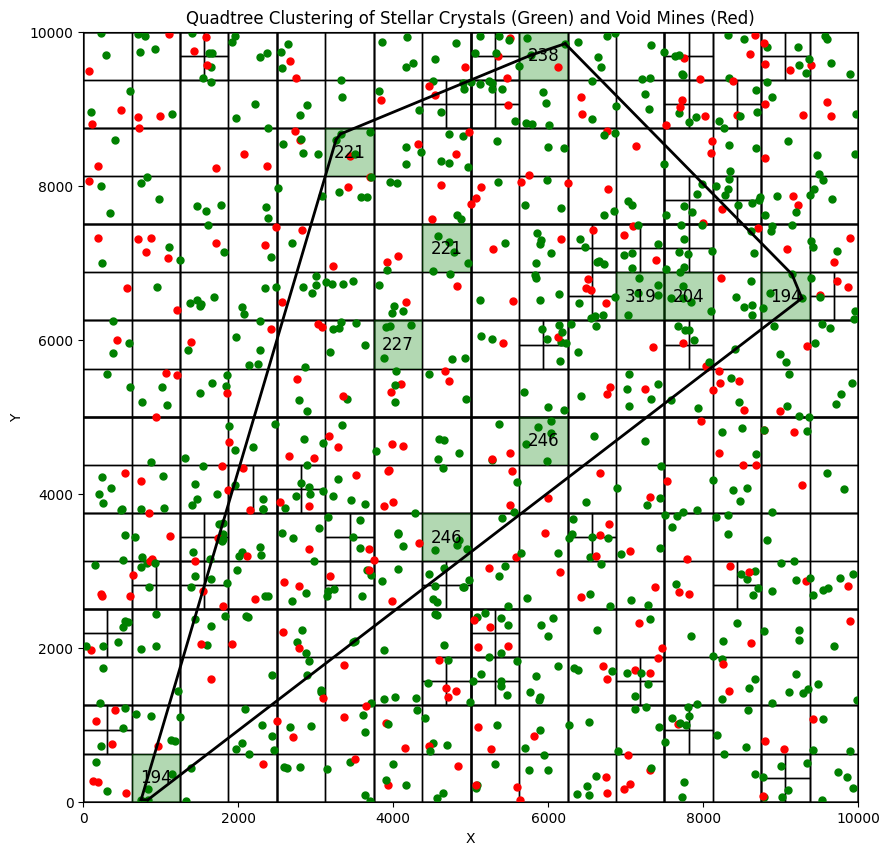

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import ConvexHull
import numpy as np
from typing import List, Tuple

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[Point] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: Point):
        """
        Insert a Point into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: Point):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[Point] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: Point, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def calculate_cluster_value(self):
        """
        Calculate the total value of points in this cluster.
        """
        return sum(point.value for point in self.points)

    def get_all_clusters(self):
        """
        Recursively get all clusters (leaf nodes) in the Quadtree.
        """
        clusters = []
        if self.divided:
            clusters.extend(self.northeast.get_all_clusters())
            clusters.extend(self.northwest.get_all_clusters())
            clusters.extend(self.southeast.get_all_clusters())
            clusters.extend(self.southwest.get_all_clusters())
        else:
            clusters.append(self)
        return clusters

    def draw(self, ax):
        """
        Recursively draw the Quadtree boundaries and points.
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Draw the points in the current node
        for point in self.points:
            color = "green" if point.value > 0 else "red"
            ax.plot(point.x, point.y, "o", color=color, markersize=5)

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate random Points
    points = generate_points(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Points into the Quadtree
    for point in points:
        quadtree.insert(point)

    # Get all clusters (leaf nodes) in the Quadtree
    clusters = quadtree.get_all_clusters()

    # Calculate the value of each cluster
    cluster_values = [(cluster, cluster.calculate_cluster_value()) for cluster in clusters]

    # Sort clusters by value
    cluster_values.sort(key=lambda x: x[1], reverse=True)

    # Select the 10 most valuable clusters
    most_valuable = cluster_values[:10]

    # Collect all points from the 10 most valuable clusters
    points_in_most_valuable = []
    for cluster, _ in most_valuable:
        points_in_most_valuable.extend(cluster.points)

    # Extract coordinates for the convex hull
    hull_points = np.array([[point.x, point.y] for point in points_in_most_valuable])

    # Compute the convex hull
    hull = ConvexHull(hull_points)

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the Quadtree
    quadtree.draw(ax)

    # Highlight the 10 most valuable clusters in green and annotate their values
    for cluster, value in most_valuable:
        x_min, y_min, x_max, y_max = cluster.boundary
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor="none", facecolor="green", alpha=0.3
        )
        ax.add_patch(rect)
        # Annotate the value of the cluster
        ax.text((x_min + x_max) / 2, (y_min + y_max) / 2, f"{value}", fontsize=12, color="black", ha="center", va="center")

    # Draw the convex hull polygon
    for simplex in hull.simplices:
        ax.plot(hull_points[simplex, 0], hull_points[simplex, 1], "k-", linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering of Stellar Crystals (Green) and Void Mines (Red)")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 6 (HIERARCHICAL CLUSTERING)

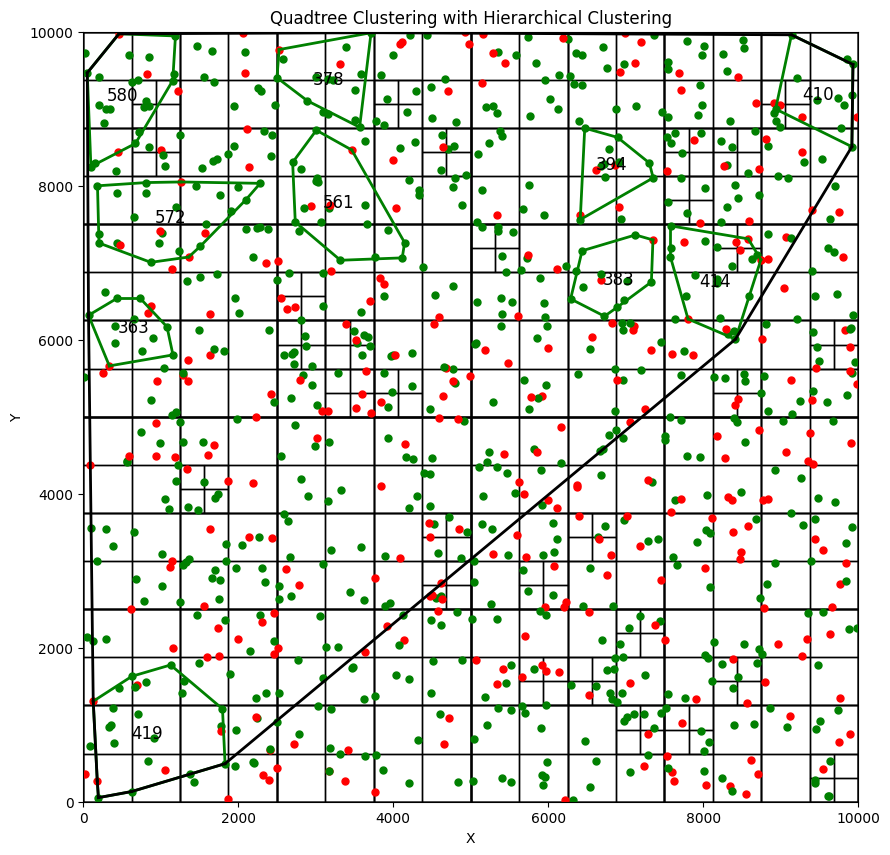

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import ConvexHull
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
from typing import List, Tuple

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Define the Quadtree class
class Quadtree:
    def __init__(self, boundary: Tuple[int, int, int, int], capacity: int = 4):
        """
        Initialize the Quadtree.
        :param boundary: A tuple (x_min, y_min, x_max, y_max) defining the bounds of the Quadtree.
        :param capacity: Maximum number of points a node can hold before splitting.
        """
        self.boundary = boundary
        self.capacity = capacity
        self.points: List[Point] = []
        self.divided = False

    def subdivide(self):
        """
        Divide the Quadtree into four child Quadtrees.
        """
        x_min, y_min, x_max, y_max = self.boundary
        mid_x = (x_min + x_max) // 2
        mid_y = (y_min + y_max) // 2

        # Create four child Quadtrees
        self.northeast = Quadtree((mid_x, mid_y, x_max, y_max), self.capacity)
        self.northwest = Quadtree((x_min, mid_y, mid_x, y_max), self.capacity)
        self.southeast = Quadtree((mid_x, y_min, x_max, mid_y), self.capacity)
        self.southwest = Quadtree((x_min, y_min, mid_x, mid_y), self.capacity)

        self.divided = True

    def insert(self, point: Point):
        """
        Insert a Point into the Quadtree.
        """
        if not self.in_boundary(point):
            return False

        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        else:
            if not self.divided:
                self.subdivide()

            if self.northeast.insert(point):
                return True
            elif self.northwest.insert(point):
                return True
            elif self.southeast.insert(point):
                return True
            elif self.southwest.insert(point):
                return True

        return False

    def in_boundary(self, point: Point):
        """
        Check if a point is within the boundary of the Quadtree.
        """
        x_min, y_min, x_max, y_max = self.boundary
        return x_min <= point.x <= x_max and y_min <= point.y <= y_max

    def query(self, region: Tuple[int, int, int, int], found: List[Point] = None):
        """
        Query the Quadtree for points within a specified region.
        """
        if found is None:
            found = []

        if not self.intersects(region):
            return found

        for point in self.points:
            if self.point_in_region(point, region):
                found.append(point)

        if self.divided:
            self.northeast.query(region, found)
            self.northwest.query(region, found)
            self.southeast.query(region, found)
            self.southwest.query(region, found)

        return found

    def intersects(self, region: Tuple[int, int, int, int]):
        """
        Check if a region intersects with the Quadtree's boundary.
        """
        x_min, y_min, x_max, y_max = self.boundary
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region

        if x_max < reg_x_min or x_min > reg_x_max:
            return False
        if y_max < reg_y_min or y_min > reg_y_max:
            return False

        return True

    def point_in_region(self, point: Point, region: Tuple[int, int, int, int]):
        """
        Check if a point lies within a specified region.
        """
        reg_x_min, reg_y_min, reg_x_max, reg_y_max = region
        return reg_x_min <= point.x <= reg_x_max and reg_y_min <= point.y <= reg_y_max

    def calculate_cluster_value(self):
        """
        Calculate the total value of points in this cluster.
        """
        return sum(point.value for point in self.points)

    def get_all_clusters(self):
        """
        Recursively get all clusters (leaf nodes) in the Quadtree.
        """
        clusters = []
        if self.divided:
            clusters.extend(self.northeast.get_all_clusters())
            clusters.extend(self.northwest.get_all_clusters())
            clusters.extend(self.southeast.get_all_clusters())
            clusters.extend(self.southwest.get_all_clusters())
        else:
            clusters.append(self)
        return clusters

    def draw(self, ax):
        """
        Recursively draw the Quadtree boundaries and points.
        """
        x_min, y_min, x_max, y_max = self.boundary
        width = x_max - x_min
        height = y_max - y_min

        # Draw the boundary of the current node
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=1, edgecolor="black", facecolor="none"
        )
        ax.add_patch(rect)

        # Draw the points in the current node
        for point in self.points:
            color = "green" if point.value > 0 else "red"
            ax.plot(point.x, point.y, "o", color=color, markersize=5)

        # Recursively draw child nodes
        if self.divided:
            self.northeast.draw(ax)
            self.northwest.draw(ax)
            self.southeast.draw(ax)
            self.southwest.draw(ax)

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Perform hierarchical clustering on clusters
def hierarchical_clustering(clusters, max_d: float = 2000):
    """
    Perform hierarchical clustering on clusters.
    :param clusters: List of clusters (Quadtree nodes).
    :param max_d: Maximum distance between clusters to merge them.
    :return: List of merged clusters.
    """
    # Extract centroids of clusters
    centroids = []
    for cluster in clusters:
        x_min, y_min, x_max, y_max = cluster.boundary
        centroid_x = (x_min + x_max) / 2
        centroid_y = (y_min + y_max) / 2
        centroids.append([centroid_x, centroid_y])

    # Perform hierarchical clustering
    Z = linkage(centroids, method="ward")
    cluster_labels = fcluster(Z, max_d, criterion="distance")

    # Merge clusters based on labels
    merged_clusters = []
    for label in set(cluster_labels):
        merged_points = []
        for i, cluster in enumerate(clusters):
            if cluster_labels[i] == label:
                merged_points.extend(cluster.points)
        merged_clusters.append(merged_points)

    return merged_clusters

# Main function to demonstrate Quadtree clustering and visualization
def main():
    # Generate random Points
    points = generate_points(1000)

    # Define the Quadtree boundary (entire space)
    boundary = (0, 0, 10000, 10000)
    quadtree = Quadtree(boundary, capacity=4)

    # Insert Points into the Quadtree
    for point in points:
        quadtree.insert(point)

    # Get all clusters (leaf nodes) in the Quadtree
    clusters = quadtree.get_all_clusters()

    # Perform hierarchical clustering on clusters
    merged_clusters = hierarchical_clustering(clusters, max_d=2000)

    # Calculate the value of each merged cluster
    merged_cluster_values = [(cluster, sum(point.value for point in cluster)) for cluster in merged_clusters]

    # Sort merged clusters by value
    merged_cluster_values.sort(key=lambda x: x[1], reverse=True)

    # Select the 10 most valuable merged clusters
    most_valuable = merged_cluster_values[:10]

    # Collect all points from the 10 most valuable merged clusters
    points_in_most_valuable = []
    for cluster, _ in most_valuable:
        points_in_most_valuable.extend(cluster)

    # Extract coordinates for the convex hull
    hull_points = np.array([[point.x, point.y] for point in points_in_most_valuable])

    # Compute the convex hull
    hull = ConvexHull(hull_points)

    # Visualize the Quadtree and clusters
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the Quadtree
    quadtree.draw(ax)

    # Highlight the 10 most valuable merged clusters in green and annotate their values
    for cluster, value in most_valuable:
        # Draw the convex hull of the merged cluster
        cluster_points = np.array([[point.x, point.y] for point in cluster])
        if len(cluster_points) >= 3:  # Convex hull requires at least 3 points
            cluster_hull = ConvexHull(cluster_points)
            for simplex in cluster_hull.simplices:
                ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], "g-", linewidth=2)
        # Annotate the value of the cluster
        centroid_x = np.mean(cluster_points[:, 0])
        centroid_y = np.mean(cluster_points[:, 1])
        ax.text(centroid_x, centroid_y, f"{value}", fontsize=12, color="black", ha="center", va="center")

    # Draw the convex hull polygon for the 10 most valuable merged clusters
    for simplex in hull.simplices:
        ax.plot(hull_points[simplex, 0], hull_points[simplex, 1], "k-", linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Quadtree Clustering with Hierarchical Clustering")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 1 (VORONOI DIAGRAM IMPLEMENTATION WITH VERY FEW POINTS)

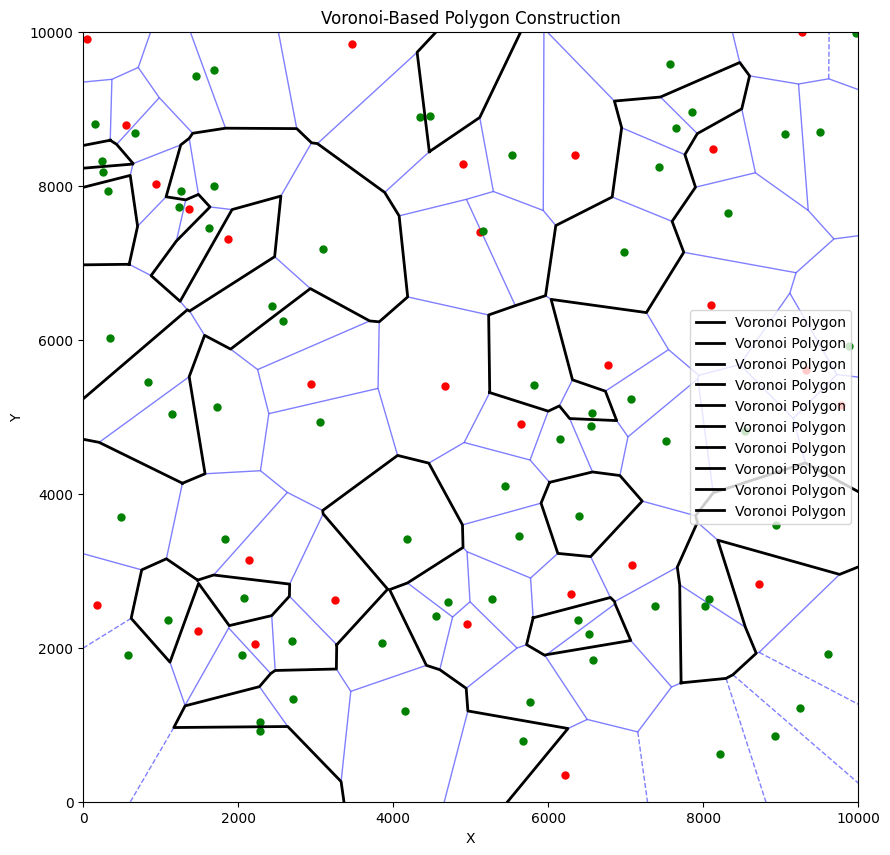

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Function to create a polygon from Voronoi cells
def create_voronoi_polygon(points, values, threshold: float):
    """
    Create a polygon by merging Voronoi cells with values above a threshold.
    :param points: List of (x, y) coordinates.
    :param values: List of values corresponding to the points.
    :param threshold: Value threshold for including Voronoi cells.
    :return: A Shapely Polygon or MultiPolygon representing the merged region.
    """
    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Create a list to store the polygons of the selected Voronoi cells
    polygons = []

    # Iterate over Voronoi regions
    for i, region_index in enumerate(vor.point_region):
        region = vor.regions[region_index]
        if not region:  # Skip empty regions
            continue
        if -1 in region:  # Skip infinite regions
            continue
        # Get the vertices of the Voronoi cell
        polygon_vertices = [vor.vertices[j] for j in region]
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        # Check if the value of the point is above the threshold
        if values[i] > threshold:
            polygons.append(polygon)

    # Merge the selected polygons into a single polygon or multipolygon
    merged_polygon = unary_union(polygons)
    return merged_polygon

# Main function to demonstrate Voronoi-based polygon construction
def main():
    # Generate random Points
    points = generate_points(100)

    # Extract coordinates and values
    coords = np.array([[point.x, point.y] for point in points])
    values = np.array([point.value for point in points])

    # Define a threshold for selecting Voronoi cells
    threshold = 50  # Only include cells with values above this threshold

    # Create the Voronoi-based polygon
    voronoi_polygon = create_voronoi_polygon(coords, values, threshold)

    # Visualize the Voronoi diagram and the polygon
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the Voronoi diagram
    vor = Voronoi(coords)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors="blue", line_width=1, line_alpha=0.5)

    # Plot the points
    for point in points:
        color = "green" if point.value > 0 else "red"
        ax.plot(point.x, point.y, "o", color=color, markersize=5)

    # Plot the Voronoi-based polygon
    if isinstance(voronoi_polygon, Polygon):
        x, y = voronoi_polygon.exterior.xy
        ax.plot(x, y, "k-", linewidth=2, label="Voronoi Polygon")
    elif isinstance(voronoi_polygon, MultiPolygon):
        for polygon in voronoi_polygon.geoms:
            x, y = polygon.exterior.xy
            ax.plot(x, y, "k-", linewidth=2, label="Voronoi Polygon")

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Voronoi-Based Polygon Construction")
    ax.legend()

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 2 (1000 POINTS)

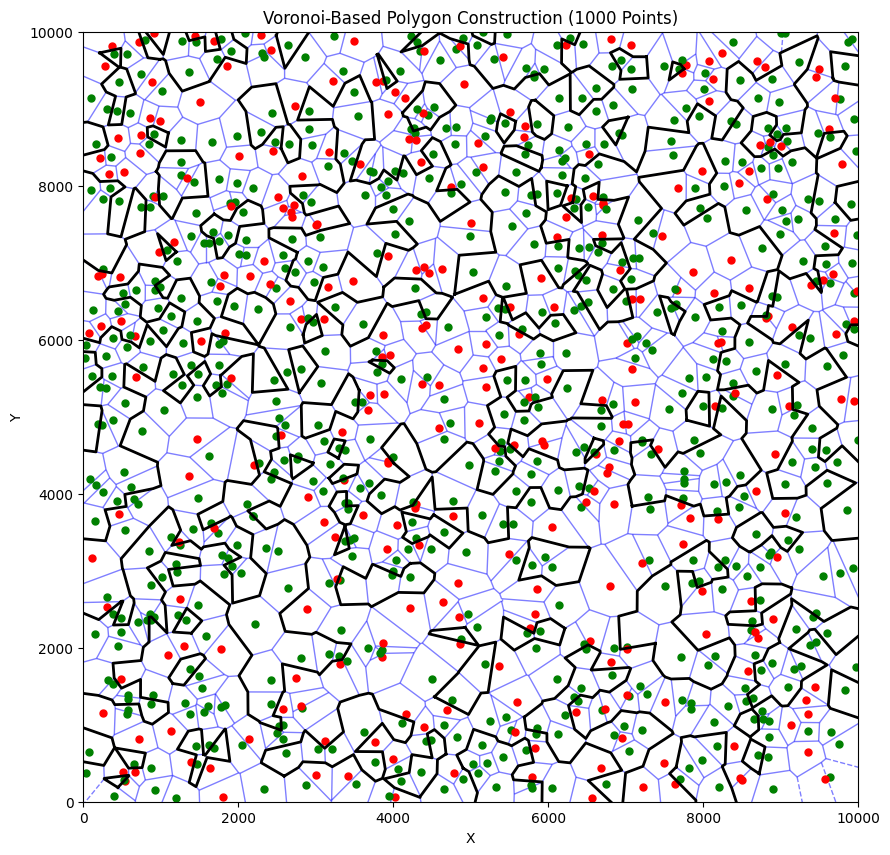

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import unary_union

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.7:  # 70% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Function to create a polygon from Voronoi cells
def create_voronoi_polygon(points, values, threshold: float):
    """
    Create a polygon by merging Voronoi cells with values above a threshold.
    :param points: List of (x, y) coordinates.
    :param values: List of values corresponding to the points.
    :param threshold: Value threshold for including Voronoi cells.
    :return: A Shapely Polygon or MultiPolygon representing the merged region.
    """
    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Create a list to store the polygons of the selected Voronoi cells
    polygons = []

    # Iterate over Voronoi regions
    for i, region_index in enumerate(vor.point_region):
        region = vor.regions[region_index]
        if not region:  # Skip empty regions
            continue
        if -1 in region:  # Skip infinite regions
            continue
        # Get the vertices of the Voronoi cell
        polygon_vertices = [vor.vertices[j] for j in region]
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        # Check if the value of the point is above the threshold
        if values[i] > threshold:
            polygons.append(polygon)

    # Merge the selected polygons into a single polygon or multipolygon
    merged_polygon = unary_union(polygons)
    return merged_polygon

# Main function to demonstrate Voronoi-based polygon construction
def main():
    # Generate random Points
    points = generate_points(1000)  # Changed from 100 to 1000

    # Extract coordinates and values
    coords = np.array([[point.x, point.y] for point in points])
    values = np.array([point.value for point in points])

    # Define a threshold for selecting Voronoi cells
    threshold = 50  # Only include cells with values above this threshold

    # Create the Voronoi-based polygon
    voronoi_polygon = create_voronoi_polygon(coords, values, threshold)

    # Visualize the Voronoi diagram and the polygon
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the Voronoi diagram
    vor = Voronoi(coords)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors="blue", line_width=1, line_alpha=0.5)

    # Plot the points
    for point in points:
        color = "green" if point.value > 0 else "red"
        ax.plot(point.x, point.y, "o", color=color, markersize=5)

    # Plot the Voronoi-based polygon
    if isinstance(voronoi_polygon, Polygon):
        x, y = voronoi_polygon.exterior.xy
        ax.plot(x, y, "k-", linewidth=2)
    elif isinstance(voronoi_polygon, MultiPolygon):
        for polygon in voronoi_polygon.geoms:
            x, y = polygon.exterior.xy
            ax.plot(x, y, "k-", linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Voronoi-Based Polygon Construction (1000 Points)")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 3 (CREATES AN ILLEGAL MULTIPOLYGON)

Value of the polygon: 25905
Number of sides of the polygon: 882


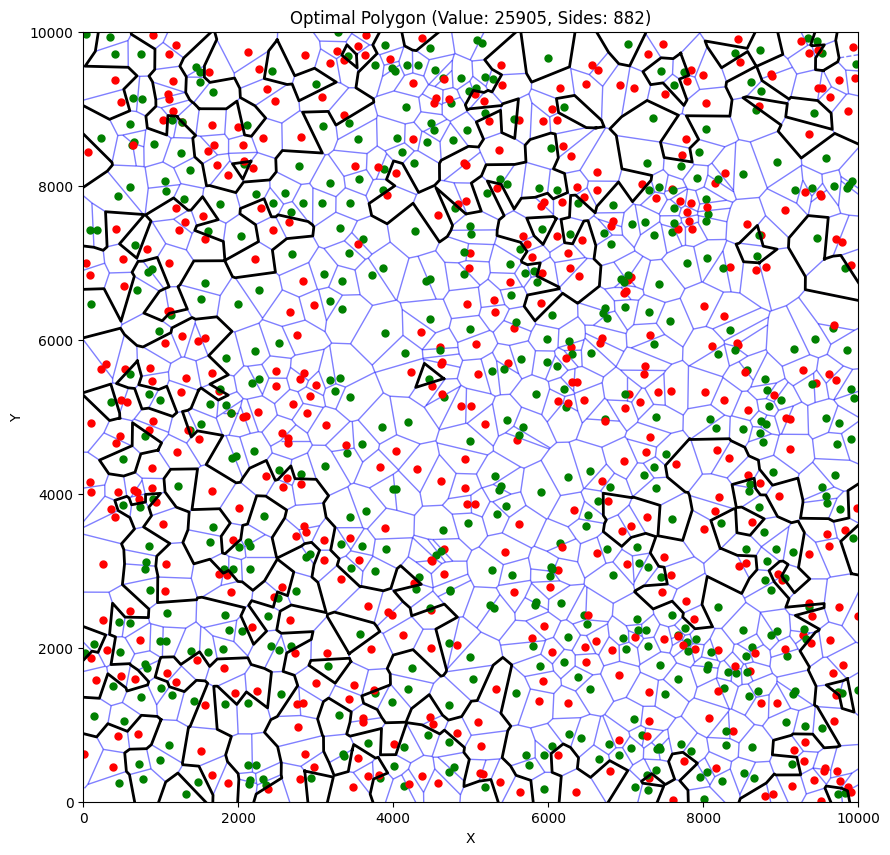

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, MultiPolygon, Point as ShapelyPoint
from shapely.ops import unary_union

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.5:  # 50% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Function to create a polygon from Voronoi cells
def create_optimal_polygon(points, values):
    """
    Create a polygon by merging Voronoi cells to maximize the sum of values (Stellar Crystals)
    while minimizing the inclusion of negative values (Void Mines).
    :param points: List of (x, y) coordinates.
    :param values: List of values corresponding to the points.
    :return: A Shapely Polygon or MultiPolygon representing the optimal region.
    """
    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Create a list to store the polygons and their corresponding values
    cell_polygons = []
    cell_values = []

    # Iterate over Voronoi regions
    for i, region_index in enumerate(vor.point_region):
        region = vor.regions[region_index]
        if not region or -1 in region:  # Skip empty or infinite regions
            continue
        # Get the vertices of the Voronoi cell
        polygon_vertices = [vor.vertices[j] for j in region]
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        cell_polygons.append(polygon)
        cell_values.append(values[i])

    # Sort cells by value in descending order (prioritize high-value Stellar Crystals)
    sorted_indices = np.argsort(cell_values)[::-1]
    sorted_polygons = [cell_polygons[i] for i in sorted_indices]
    sorted_values = [cell_values[i] for i in sorted_indices]

    # Greedily add cells to the polygon until adding more cells reduces the total score
    total_value = 0
    selected_polygons = []
    for polygon, value in zip(sorted_polygons, sorted_values):
        # Calculate the potential new total value if this polygon is added
        new_total_value = total_value + value
        if new_total_value > total_value:  # Only add if it improves the total score
            selected_polygons.append(polygon)
            total_value = new_total_value

    # Merge the selected polygons into a single polygon or multipolygon
    optimal_polygon = unary_union(selected_polygons)
    return optimal_polygon, total_value

# Function to calculate the value of the polygon
def calculate_polygon_value(polygon, points):
    """
    Calculate the total value of all points (Stellar Crystals and Void Mines) inside the polygon.
    :param polygon: A Shapely Polygon or MultiPolygon.
    :param points: List of Point objects.
    :return: The total value of points inside the polygon.
    """
    total_value = 0
    for point in points:
        shapely_point = ShapelyPoint(point.x, point.y)
        if polygon.contains(shapely_point):
            total_value += point.value
    return total_value

# Function to count the number of sides of the polygon
def count_polygon_sides(polygon):
    """
    Count the number of sides (edges) of a Shapely Polygon or MultiPolygon.
    :param polygon: A Shapely Polygon or MultiPolygon.
    :return: The total number of sides.
    """
    if isinstance(polygon, Polygon):
        # For a single polygon, count the vertices in the exterior
        return len(polygon.exterior.coords) - 1  # Subtract 1 to close the loop
    elif isinstance(polygon, MultiPolygon):
        # For a multipolygon, sum the sides of all individual polygons
        total_sides = 0
        for poly in polygon.geoms:
            total_sides += len(poly.exterior.coords) - 1
        return total_sides
    else:
        raise ValueError("Input must be a Shapely Polygon or MultiPolygon.")

# Main function to demonstrate Voronoi-based polygon construction
def main():
    # Generate random Points
    points = generate_points(1000)  # Generate 1000 points

    # Extract coordinates and values
    coords = np.array([[point.x, point.y] for point in points])
    values = np.array([point.value for point in points])

    # Create the optimal polygon
    optimal_polygon, _ = create_optimal_polygon(coords, values)

    # Calculate the value of the polygon
    polygon_value = calculate_polygon_value(optimal_polygon, points)
    print(f"Value of the polygon: {polygon_value}")

    # Count the number of sides of the polygon
    num_sides = count_polygon_sides(optimal_polygon)
    print(f"Number of sides of the polygon: {num_sides}")

    # Visualize the Voronoi diagram and the polygon
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the Voronoi diagram
    vor = Voronoi(coords)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors="blue", line_width=1, line_alpha=0.5)

    # Plot the points
    for point in points:
        color = "green" if point.value > 0 else "red"
        ax.plot(point.x, point.y, "o", color=color, markersize=5)

    # Plot the optimal polygon
    if isinstance(optimal_polygon, Polygon):
        x, y = optimal_polygon.exterior.xy
        ax.plot(x, y, "k-", linewidth=2)
    elif isinstance(optimal_polygon, MultiPolygon):
        for polygon in optimal_polygon.geoms:
            x, y = polygon.exterior.xy
            ax.plot(x, y, "k-", linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Optimal Polygon (Value: {polygon_value}, Sides: {num_sides})")

    plt.show()

if __name__ == "__main__":
    main()

# VERSION 4

Value of the polygon: 7667
Number of sides of the polygon: 301


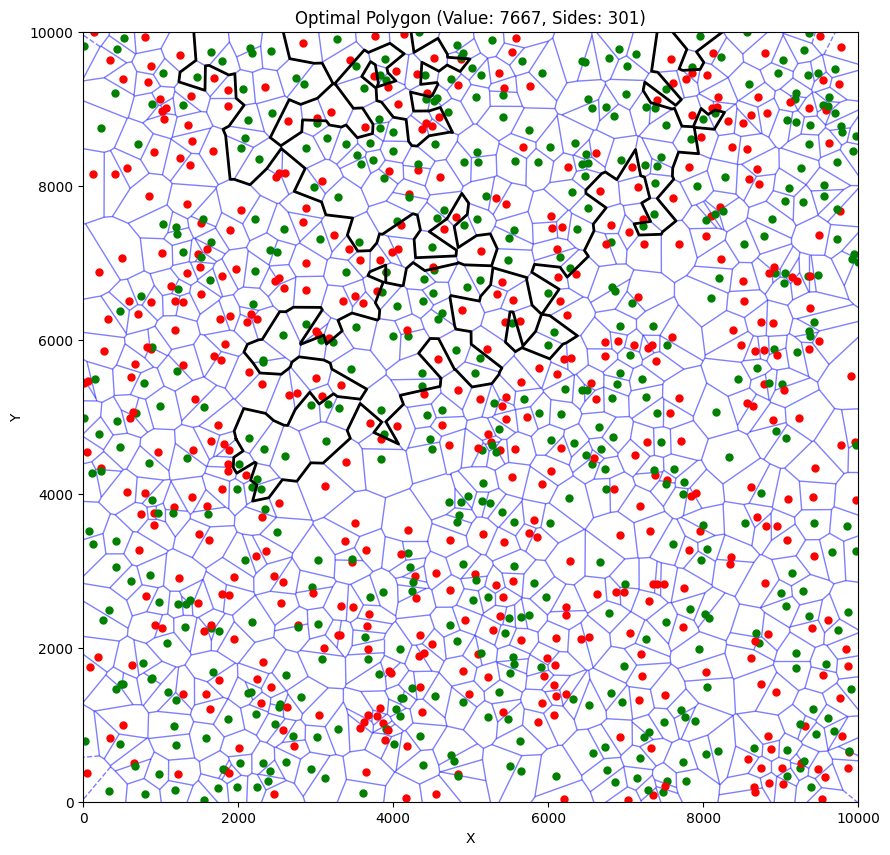

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point as ShapelyPoint
from shapely.ops import unary_union
from collections import deque

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define a class for Points (Stellar Crystals and Void Mines)
class Point:
    def __init__(self, x: int, y: int, value: int):
        self.x = x
        self.y = y
        self.value = value

    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, value={self.value})"

# Generate random Points (Stellar Crystals and Void Mines)
def generate_points(n: int, max_x: int = 10000, max_y: int = 10000):
    points = []
    for _ in range(n):
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
        # Randomly assign positive values to Stellar Crystals and negative values to Void Mines
        if random.random() < 0.5:  # 50% chance of Stellar Crystal
            value = random.randint(1, 100)  # Random positive value
        else:
            value = random.randint(-100, -1)  # Random negative value
        points.append(Point(x, y, value))
    return points

# Function to create a single connected polygon from Voronoi cells
def create_connected_polygon(points, values, max_sides: int = 100):
    """
    Create a single connected polygon by merging adjacent Voronoi cells.
    :param points: List of (x, y) coordinates.
    :param values: List of values corresponding to the points.
    :param max_sides: Maximum number of sides allowed in the final polygon.
    :return: A Shapely Polygon representing the connected region.
    """
    # Compute the Voronoi diagram
    vor = Voronoi(points)

    # Create a list to store the polygons and their corresponding values
    cell_polygons = []
    cell_values = []

    # Iterate over Voronoi regions
    for i, region_index in enumerate(vor.point_region):
        region = vor.regions[region_index]
        if not region or -1 in region:  # Skip empty or infinite regions
            continue
        # Get the vertices of the Voronoi cell
        polygon_vertices = [vor.vertices[j] for j in region]
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        cell_polygons.append(polygon)
        cell_values.append(values[i])

    # Sort cells by value in descending order (prioritize high-value Stellar Crystals)
    sorted_indices = np.argsort(cell_values)[::-1]
    sorted_polygons = [cell_polygons[i] for i in sorted_indices]
    sorted_values = [cell_values[i] for i in sorted_indices]

    # Start with the highest-value cell
    connected_polygon = sorted_polygons[0]
    total_value = sorted_values[0]
    num_sides = count_polygon_sides(connected_polygon)

    # Use a queue to manage adjacent cells
    queue = deque()
    queue.extend(range(1, len(sorted_polygons)))

    # Iteratively add adjacent cells
    while queue and num_sides < max_sides:
        i = queue.popleft()
        polygon = sorted_polygons[i]
        value = sorted_values[i]

        # Check if the new polygon intersects with the current connected polygon
        if connected_polygon.intersects(polygon):
            # Calculate the potential new total value
            new_total_value = total_value + value
            if new_total_value > total_value:  # Only add if it improves the total score
                connected_polygon = unary_union([connected_polygon, polygon])
                total_value = new_total_value
                num_sides = count_polygon_sides(connected_polygon)
        else:
            # Requeue the cell for later consideration
            queue.append(i)

    return connected_polygon, total_value

# Function to check if a point is inside the polygon
def is_point_inside_polygon(point, polygon):
    shapely_point = ShapelyPoint(point.x, point.y)
    return polygon.contains(shapely_point)

# Function to calculate the value of the polygon
def calculate_polygon_value(polygon, points):
    """
    Calculate the total value of all points (Stellar Crystals and Void Mines) inside the polygon.
    :param polygon: A Shapely Polygon.
    :param points: List of Point objects.
    :return: The total value of points inside the polygon.
    """
    total_value = 0
    for point in points:
        if is_point_inside_polygon(point, polygon):
            total_value += point.value
    return total_value

# Function to count the number of sides of the polygon
def count_polygon_sides(polygon):
    """
    Count the number of sides (edges) of a Shapely Polygon.
    :param polygon: A Shapely Polygon.
    :return: The total number of sides.
    """
    return len(polygon.exterior.coords) - 1  # Subtract 1 to close the loop

# Main function to demonstrate Voronoi-based polygon construction
def main():
    # Generate random Points
    n_points = 1000  # Number of points
    points = generate_points(n_points)

    # Extract coordinates and values
    coords = np.array([[point.x, point.y] for point in points])
    values = np.array([point.value for point in points])

    # Create the optimal connected polygon
    max_sides = 300  # Maximum number of sides
    connected_polygon, _ = create_connected_polygon(coords, values, max_sides)

    # Calculate the value of the polygon
    polygon_value = calculate_polygon_value(connected_polygon, points)
    print(f"Value of the polygon: {polygon_value}")

    # Count the number of sides of the polygon
    num_sides = count_polygon_sides(connected_polygon)
    print(f"Number of sides of the polygon: {num_sides}")

    # Visualize the points and the polygon
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the Voronoi diagram
    vor = Voronoi(coords)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors="blue", line_width=1, line_alpha=0.5)

    # Plot the points
    for point in points:
        color = "green" if point.value > 0 else "red"
        ax.plot(point.x, point.y, "o", color=color, markersize=5)

    # Plot the connected polygon
    x, y = connected_polygon.exterior.xy
    ax.plot(x, y, "k-", linewidth=2)

    # Set plot limits and labels
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Optimal Polygon (Value: {polygon_value}, Sides: {num_sides})")

    plt.show()

if __name__ == "__main__":
    main()